<a href="https://colab.research.google.com/github/hucarlos08/Geo-ML-AT/blob/main/Gibbs_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gibbs Sampling in MCMC

## Introduction
Gibbs sampling addresses some of the challenges inherent in the Metropolis-Hastings (MH) method within Markov Chain Monte Carlo (MCMC) techniques. It eliminates the need for a proposal distribution and ensures a high acceptance rate, optimizing the sampling efficiency. This document dissects these aspects, providing a comprehensive understanding of Gibbs sampling and its operational superiority in certain scenarios.

## Metropolis-Hastings: Challenges Overcome by Gibbs Sampling
Metropolis-Hastings, a well-known MCMC method, faces two significant hurdles:
1. **Proposal Distribution Selection:** The user is tasked with choosing a suitable proposal distribution, a non-trivial requirement demanding substantial insight into the target distribution.
2. **Low Acceptance Rate:** MH can suffer from a low acceptance rate, rendering many proposed samples as rejected and the process inefficient.

Gibbs sampling elegantly addresses these issues, utilizing the conditional independence properties of graphical models. This approach updates one variable at a time, cycling through each systematically. It draws from the exact conditional distributions, negating the need for proposal distributions and ensuring an acceptance probability of 1.


## Advanced Techniques and Parallelization in Gibbs Sampling
In scenarios permitting, Gibbs sampling can be enhanced through parallelization. This method relies on graph coloring, where non-neighboring nodes (independent variables) are similarly colored and sampled simultaneously, boosting efficiency. The process, though theoretically demanding, reaps computational time savings and is particularly beneficial in complex, high-dimensional models.

The concept also ties in with variational inference, especially using the Markov blanket for determining dependencies, showcasing the versatility and depth of Gibbs sampling methodology within the broader MCMC framework.


**Gibbs Sampling: Basic Idea**

Gibbs sampling is a Markov Chain Monte Carlo (MCMC) technique used to generate samples from a multivariate distribution by sequentially sampling each variable conditioned on the current values of all other variables.

**Mathematical Overview**:

Suppose we have $D$ variables. The sampling procedure for one iteration would be:

1. Sample $x_1$ given the current values of $x_2, x_3, \ldots, x_D$.
2. Sample $x_2$ given the current values (including the newly sampled value of $x_1$) of $x_1, x_3, \ldots, x_D$.
3. Continue this process up to $x_D$.

Mathematically:

$$
\begin{align}
x^{s+1}_1 &\sim p(x_1 | x^s_2, x^s_3, \ldots, x^s_D)\\
x^{s+1}_2 &\sim p(x_2 | x^{s+1}_1, x^s_3, \ldots, x^s_D) \\
&\vdots \\
x^{s+1}_D &\sim p(x_D | x^{s+1}_1, x^{s+1}_2, \ldots, x^{s+1}_{D-1})
\end{align}
$$

**12.3.2 Gibbs Sampling as a Special Case of Metropolis-Hastings**

Gibbs sampling is essentially a specialized form of the Metropolis-Hastings (MH) algorithm. While the MH algorithm proposes a new state (sample) from a proposal distribution and then decides to accept or reject that state based on an acceptance probability, in Gibbs sampling, the proposed sample is always accepted.

The specific relation between Gibbs and MH focuses on how the proposed sample is chosen. In Gibbs sampling, the proposal distribution for a specific variable is its conditional distribution given the other variables. Mathematically, if we're sampling for the variable $x_i$, the proposal distribution $q_i$ is:

$$
q_i(x'_i | x_i) = p(x'_i | x_{-i})
$$

Where $x_{-i}$ represents all variables other than $x_i$. The key feature here is that the proposed sample is chosen in such a way that it is always accepted, resulting in an acceptance probability of 1.

To understand this in depth, consider the acceptance probability calculation in MH:

$$
A_i = \min \left(1, \frac{p(x'_i | x_{-i}) \times q_i(x_i | x'_i)}{p(x_i | x_{-i}) \times q_i(x'_i | x_i)} \right)
$$

Given that $q_i(x'_i | x_i) = p(x'_i | x_{-i})$ and $q_i(x_i | x'_i) = p(x_i | x_{-i})$, the numerator and denominator terms cancel out, making $A_i = 1$.

This showcases that Gibbs sampling is essentially an MH case where the acceptance probability is always 1, thanks to the choice of the proposal distribution.

---

**Python Illustration**:

Let's consider a simple bivariate normal distribution where we want to sample from one variable conditioned on the other. We'll illustrate how Gibbs sampling seamlessly fits into the MH framework but always accepts the proposed sample.

For a clearer understanding, let's consider a bivariate normal distribution with means $\mu_1$ and $\mu_2$, standard deviations $\sigma_1$ and $\sigma_2$, and a correlation coefficient $\rho$.

The conditional distribution of $x_1$ given $x_2$ is also normal with:

1. Conditional mean:
$$
\mu_{1|2} = \mu_1 + \rho \frac{\sigma_1}{\sigma_2} (x_2 - \mu_2)
$$

2. Conditional variance:
$$
\sigma^2_{1|2} = \sigma_1^2 (1 - \rho^2)
$$

These formulas are derived from the properties of the bivariate normal distribution. These formulas allow us to sample $x_1$ given an observed value of $x_2$ (and vice versa) directly from a normal distribution, which is essential for the Gibbs sampling process in this context.

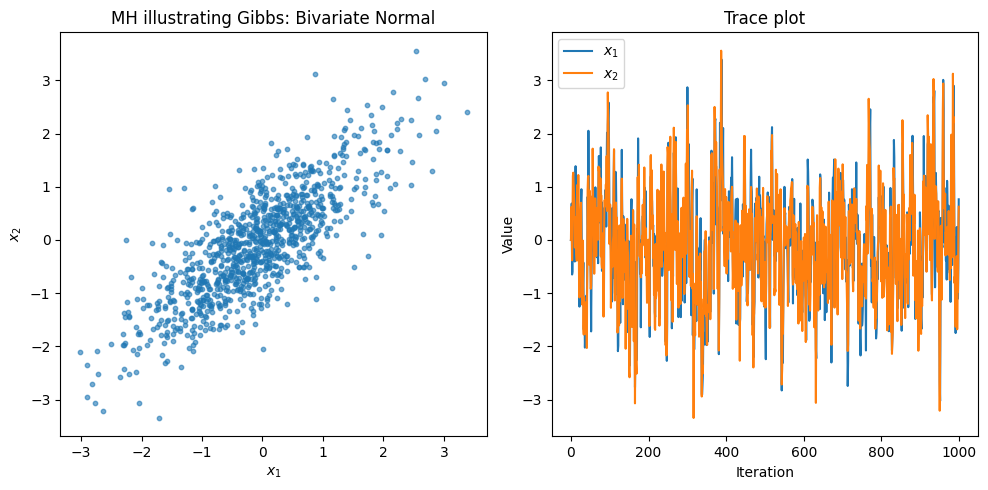

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate Gibbs sampling for a bivariate normal distribution

# Parameters for the bivariate normal distribution
mu = [0, 0]
sigma_1 = 1
sigma_2 = 1
rho = 0.8  # correlation coefficient
cov_matrix = [[sigma_1**2, rho * sigma_1 * sigma_2],
             [rho * sigma_1 * sigma_2, sigma_2**2]]

def metropolis_hastings_gibbs(initial_state, iterations=1000):
    """
    Metropolis-Hastings implementation illustrating Gibbs as a special case.
    Using a bivariate normal distribution for demonstration.
    """
    samples = np.zeros((iterations, 2))
    samples[0] = initial_state

    for i in range(1, iterations):
        # Copy the previous state
        samples[i] = samples[i-1].copy()

        # For each variable
        for j in range(2):
            # Gibbs step: propose a new sample from the conditional distribution
            if j == 0:
                mu_j_given_not_j = mu[0] + rho * sigma_1/sigma_2 * (samples[i, 1] - mu[1])
                sigma_j_given_not_j = sigma_1 * np.sqrt(1 - rho**2)
            else:
                mu_j_given_not_j = mu[1] + rho * sigma_2/sigma_1 * (samples[i, 0] - mu[0])
                sigma_j_given_not_j = sigma_2 * np.sqrt(1 - rho**2)

            proposed_sample = np.random.normal(mu_j_given_not_j, sigma_j_given_not_j)

            # Since Gibbs is a special case of MH, the acceptance probability is always 1
            # Therefore, we always accept the proposed sample
            samples[i, j] = proposed_sample

    return samples

# Generate samples using Metropolis-Hastings illustrating Gibbs
mh_gibbs_samples = metropolis_hastings_gibbs([0, 0])

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(mh_gibbs_samples[:, 0], mh_gibbs_samples[:, 1], alpha=0.6, s=10)
plt.title("MH illustrating Gibbs: Bivariate Normal")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(1, 2, 2)
plt.plot(mh_gibbs_samples[:, 0], label='$x_1$')
plt.plot(mh_gibbs_samples[:, 1], label='$x_2$')
plt.title("Trace plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()

plt.tight_layout()
plt.show()


## Ising Models and Potts Models: Pairwise MRFs with a 2D Grid Structure

In the realm of statistical mechanics and probabilistic graphical models, Ising models and Potts models hold a significant place. Both are specific types of pairwise Markov Random Fields (MRFs) characterized by their 2D grid structure.

### Ising Models

At its core, the Ising model represents binary variables that can take on one of two states, often denoted as \(+1\) or \(-1\). These variables can be visualized as residing on a lattice or grid, where each node or site represents a particular state. The primary interest lies in the interactions between these states, especially the interactions between adjacent or neighboring nodes, which are typically the only interactions considered.

The joint distribution of the system is formulated based on the interactions between these neighboring nodes and potentially an external field influencing individual nodes.

### Potts Models

The Potts model can be seen as a generalization of the Ising model. Instead of binary states, in the Potts model, each node can take on one of \(q\) possible states. Just like the Ising model, the Potts model is defined on a lattice or grid, and the interactions between neighboring nodes determine the behavior of the system.

The joint distribution of the Potts model, similar to the Ising model, is determined by the pairwise interactions on the grid and any external factors influencing the nodes.

### Joint Distribution

For both the Ising and Potts models, the joint distribution captures the probability of the entire system being in a specific configuration. This distribution is shaped by the local interactions on the grid, and it encapsulates the essence of how these models function.


### Gibbs sampling for Ising models

Ising models are a type of pairwise Markov random field used to model binary variables with local interactions. The joint distribution has the form:

\begin{equation}
p(x) = \frac{1}{Z} \prod_{i\sim j} \psi_{ij}(x_i, x_j|\boldsymbol{\theta})  
\end{equation}

Where $i \sim j$ are neighboring nodes in the graph.

To apply Gibbs sampling, we sample each variable from its full conditional distribution:

\begin{equation}
p(x_i | x_{-i}) \propto \prod_{j \in \text{nbr}(i)} \psi_{ij}(x_i, x_j)
\end{equation}

For an Ising model with potentials $\psi_{ij}(x_i, x_j) = \exp(Jx_ix_j)$, the full conditional is:

\begin{equation}
p(x_i = +1 | x_{-i}) = \sigma(2J\sum_{j \in \text{nbr}(i)} x_j)
\end{equation}

Where $\sigma(u) = \frac{1}{1 + e^{-u}}$ is the sigmoid function.

So the probability of $x_i$ being +1 is determined by how many of its neighbors agree vs. disagree with it, controlled by the coupling strength $J$.

By iteratively sampling from these conditional distributions, we can generate correlated binary samples from the Ising posterior.

### Example: Gibbs sampling for Potts models

Gibbs sampling can be applied to Potts models, which are a generalization of Ising models to multiple states. The Potts model has the following form:

\begin{equation}
p(x) = \frac{1}{Z}\exp(E(x))
\end{equation}

Where the energy function is:

\begin{equation}
E(x) = J \sum_{i\sim j} I(x_i = x_j)
\end{equation}

This encourages nearby nodes to be in the same state.

To apply Gibbs sampling, we sample from the full conditional distribution:

\begin{equation}
p(x_i = k|x_{-i}) \propto \exp\left(J \sum_{n \in \text{nbr}(i)} I(x_n = k)\right)
\end{equation}

So a node $i$ is more likely to enter a state $k$ if many of its neighbors are already in state $k$. The strength of this effect is controlled by the coupling constant $J$.

By iteratively sampling from these conditionals, we can generate correlated samples from the Potts model posterior. This allows us to approximate expectations for quantities of interest.

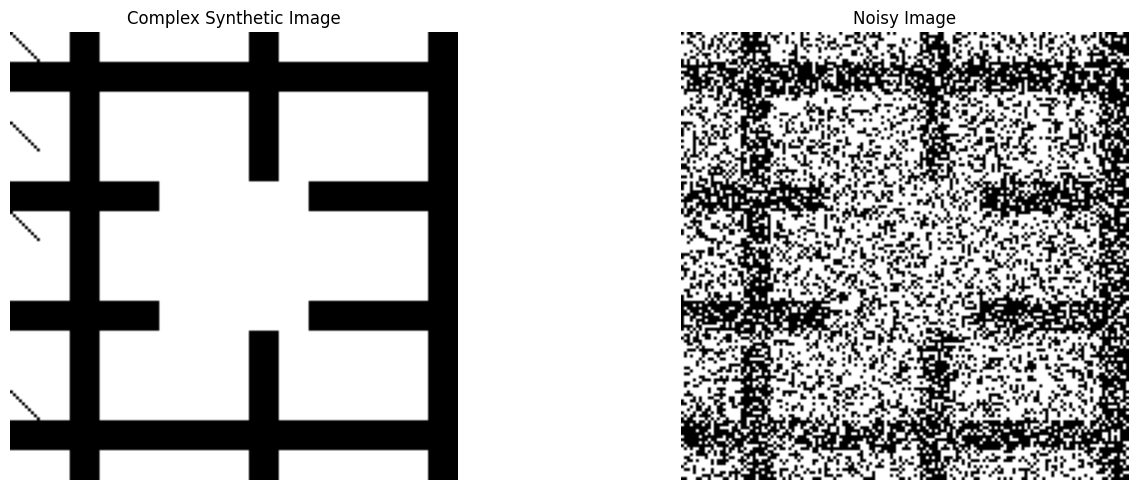

In [3]:
def generate_synthetic_image(M, N):
    """Generate a synthetic binary image with various patterns."""
    image = np.ones((M, N))

    # Add horizontal and vertical bars
    for i in range(10, M, 40):
        image[i:i+10, :] = -1
    for j in range(20, N, 60):
        image[:, j:j+10] = -1

    # Add diagonal bars
    for k in range(0, M, 30):
        for offset in range(10):
            if k + offset < M and offset < N:
                image[k+offset, offset] = -1
                image[k+offset, N-offset-1] = -1

    # Add central square
    image[M//3:2*M//3, N//3:2*N//3] = 1

    return image

def plot_images(images, titles):
    """Plot a list of images with their titles."""
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


# Generate synthetic image
M, N = 150, 150

# Add Gaussian noise to the image
sigma_noise = 2
complex_image = generate_synthetic_image(M, N)

# Add Gaussian noise to the synthetic image
noisy_complex_image = complex_image + sigma_noise * np.random.randn(M, N)
noisy_complex_image = np.sign(noisy_complex_image)  # Convert back to +1/-1 values

# Plot the synthetic image and the noisy version
plot_images([complex_image, noisy_complex_image], ["Complex Synthetic Image", "Noisy Image"])


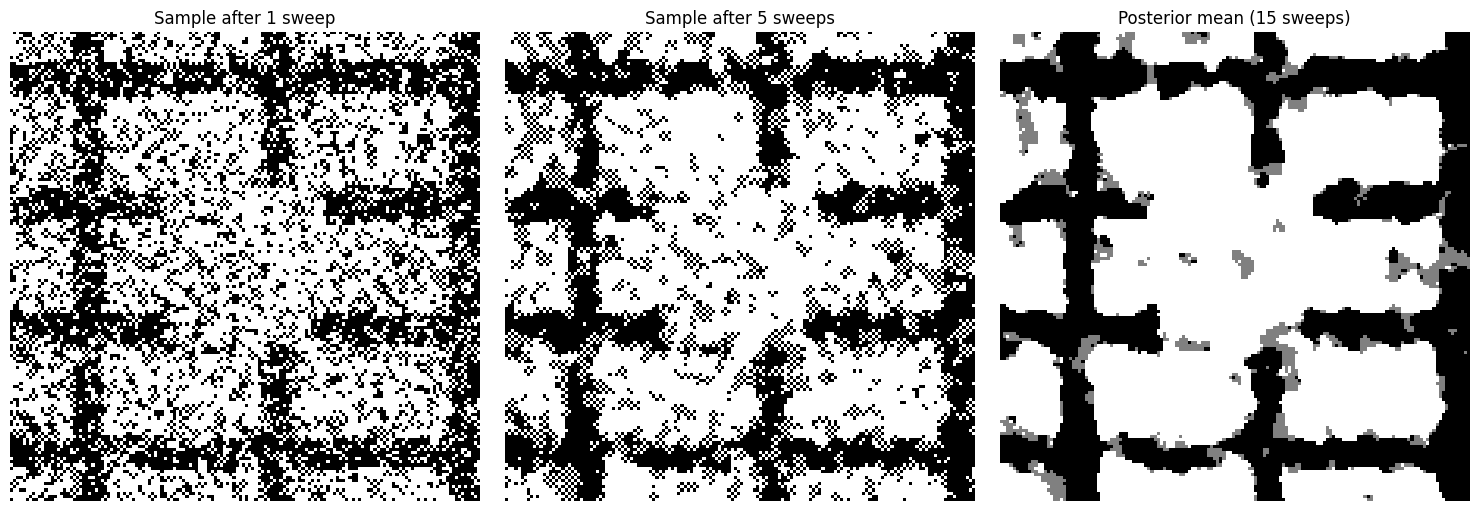

In [8]:

import numpy as np
import matplotlib.pyplot as plt

# Define some helper functions

def sigmoid(u):
    """Sigmoid function."""
    return 1 / (1 + np.exp(-u))

def gibbs_sampling_iteration(image, J=1, sigma_noise=2):
    """Perform one iteration of Gibbs sampling over the image."""
    # Get image dimensions
    M, N = image.shape
    # Copy of the image to store updates
    new_image = image.copy()

    # Loop over all pixels
    for i in range(M):
        for j in range(N):
            # Compute the sum of the neighbors
            neighbor_sum = 0
            if i > 0:  # Up
                neighbor_sum += image[i-1, j]
            if i < M-1:  # Down
                neighbor_sum += image[i+1, j]
            if j > 0:  # Left
                neighbor_sum += image[i, j-1]
            if j < N-1:  # Right
                neighbor_sum += image[i, j+1]

            # Compute the conditional probability
            prob = sigmoid(2 * J * neighbor_sum / sigma_noise**2)
            new_image[i, j] = +1 if np.random.rand() < prob else -1

    return new_image



# Add Gaussian noise to the image
sigma_noise = 2

# Perform Gibbs sampling
J = 3
num_sweeps = 25
samples = [noisy_complex_image]
for _ in range(num_sweeps):
    new_sample = gibbs_sampling_iteration(samples[-1], J, sigma_noise)
    samples.append(new_sample)

# Extract results after 1 sweep, 5 sweeps, and compute posterior mean after 15 sweeps
sample_1_sweep = samples[1]
sample_5_sweeps = samples[5]
posterior_mean = np.mean(samples[6:], axis=0)
posterior_mean = np.sign(posterior_mean)  # Convert back to +1/-1 values

# Plot the results
plot_images([sample_1_sweep, sample_5_sweeps, posterior_mean],
            ["Sample after 1 sweep", "Sample after 5 sweeps", "Posterior mean (15 sweeps)"])




## Gibbs Sampling for Gaussian Mixture Models

We consider a Gaussian mixture model with the following form:

\begin{align}
p(\mathbf{z}=k, \mathbf{x}|\theta) &= \pi_k N(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k) \\
p(\theta) &= \text{Dir}(\pi | \alpha) \prod_{k=1}^K N(\boldsymbol{\mu}_k | \mathbf{m}_0, \mathbf{V}_0) IW(\boldsymbol{\Sigma}_k, \mathbf{S}_0, \nu_0)  
\end{align}

Where $\mathbf{z}$ is the component assignment, $\pi$ are the mixture weights, $\boldsymbol{\mu}_k$ and $\boldsymbol{\Sigma}_k$ are the component means and covariances, and the priors on the parameters are Dirichlet, Gaussian, and inverse-Wishart respectively.

### Known Parameters

If the parameters $\theta$ are known, we can sample from $p(\mathbf{x},\mathbf{z}|\theta)$ using:

\begin{align}
p(\mathbf{z}=k|\mathbf{x},\theta) &\propto \pi_k N(\mathbf{x}|\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k) \\
p(\mathbf{x}|\mathbf{z}=k,\theta) &= N(\mathbf{x}|\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)
\end{align}

By iteratively sampling $\mathbf{z}$ then $\mathbf{x}$, we generate correlated samples from the posterior.

### Unknown Parameters

With unknown parameters, the full conditionals are:

\begin{align}
p(\mathbf{z}_i=k|\mathbf{x}_i,\boldsymbol{\mu},\boldsymbol{\Sigma},\pi) &\propto \pi_k N(\mathbf{x}_i|\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k) \\  
p(\pi|\mathbf{z}) &= \text{Dir}(\{\alpha_k + \sum_{i=1}^N \mathbb{I}(\mathbf{z}_i=k)\}_{k=1}^K) \\
p(\boldsymbol{\mu}_k|\boldsymbol{\Sigma}_k,\mathbf{z},\mathbf{x}) &= N(\boldsymbol{\mu}_k|\mathbf{m}_k, \mathbf{V}_k) \\
p(\boldsymbol{\Sigma}_k|\boldsymbol{\mu}_k,\mathbf{z},\mathbf{x}) &= IW(\boldsymbol{\Sigma}_k|\mathbf{S}_k, \nu_k)
\end{align}

Where $\mathbf{m}_k, \mathbf{V}_k, \mathbf{S}_k, \nu_k$ are computed from sufficient statistics over the data points assigned to component $k$.

By iteratively sampling from these full conditionals, we can draw correlated samples from the posterior over mixtures, $p(\theta, \mathbf{z}|\mathbf{x})$, allowing us to fit a Bayesian GMM to data.